<a href="https://colab.research.google.com/github/maushamkumar/Python/blob/main/task_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Insurance Dataset : https://docs.google.com/spreadsheets/d/1dAc3E4U-gBzihJ6HLM2kYVDAqQthdReg20zwwaplTW8/edit?usp=share_link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


In [26]:
insurance = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRa1wWwXmzxEvqITxj4OQTeLywlGTTsOTbhSRqKj2lPuGefjlci-DQhgLBPpgWXe8AAUu2WUBqY59X1/pub?gid=1030172542&single=true&output=csv")
insurance.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [32]:
df = insurance.copy()
df['age'].to_numpy().reshape(-1, 1).shape

(1340, 1)

### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

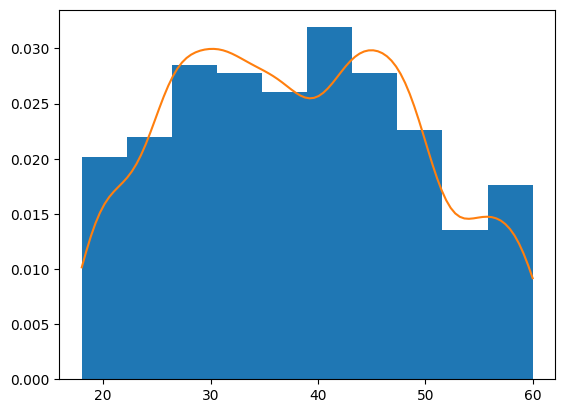

In [25]:
# code here
plt.hist(df['age'], density=True)

kde = KernelDensity(kernel='gaussian', bandwidth=2
                    ).fit(df['age'].dropna().to_numpy().reshape(-1, 1))
values = np.linspace(df['age'].min(), df['age'].max(), 100)
pdf = np.exp(kde.score_samples(values.reshape(-1, 1)))

plt.plot(values, pdf)
plt.show()

(array([0.00603452, 0.02614958, 0.04666693, 0.06416704, 0.05793137,
        0.03922436, 0.01931046, 0.00663797, 0.00281611, 0.00060345]),
 array([16.  , 19.71, 23.42, 27.13, 30.84, 34.55, 38.26, 41.97, 45.68,
        49.39, 53.1 ]),
 <BarContainer object of 10 artists>)

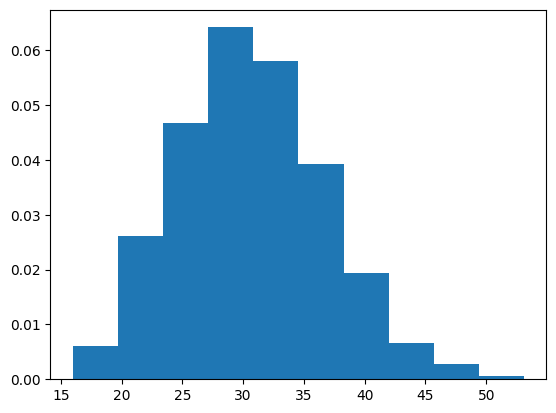

In [43]:
plt.hist(df['bmi'], density=True)

### Q-2: What is the probability of a patient having a BMI greater than 30?

In [33]:
# answer here
df['bmi'].mean()

30.668955223880598

In [34]:
df['bmi']

0       23.2
1       30.1
2       33.3
3       33.7
4       34.1
        ... 
1335    35.5
1336    38.1
1337    34.5
1338    30.4
1339    47.4
Name: bmi, Length: 1340, dtype: float64

In [37]:
s = (df['bmi'] - df['bmi'].mean())/df['bmi'].std()

<Axes: xlabel='bmi', ylabel='Density'>

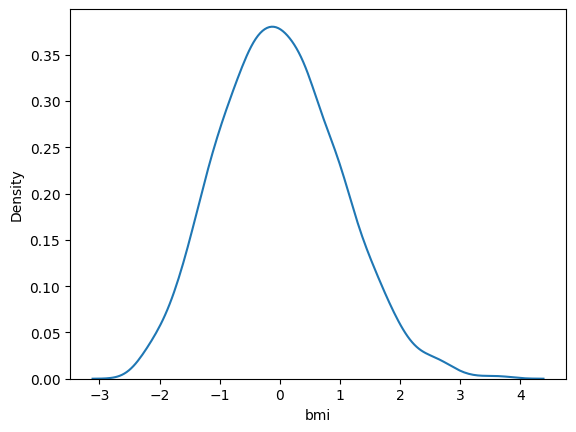

In [38]:
sns.kdeplot(s)

We can calculate the probability of a patient having the BMI greater than 30 by counting the number of patients with BMI greater than 30 and dividing by the total number of patients in the dataset.


In [39]:
bmi_greater_than_30 = len(df[df['bmi'] > 30])
total_patients = len(df)
probability = bmi_greater_than_30 / total_patients
print("Probability of a patient having BMI greater than 30:", probability)

Probability of a patient having BMI greater than 30: 0.5216417910447761


# Question 1
## What is the probability of a patient having age greater than 35?

In [41]:
age_greater_than_35 = len(df[df['age']> 35])
total_patients = len(df)
probability = age_greater_than_35 / total_patients
print("Probability of a patient having age greater than 35:", probability)

Probability of a patient having age greater than 35: 0.5574626865671641


### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

(array([1066.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         274.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

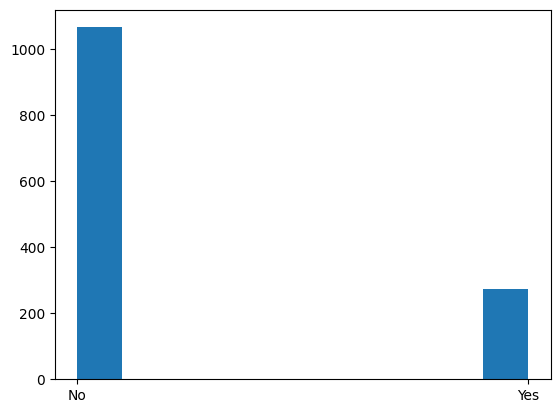

In [44]:
plt.hist(df['smoker'])

In [46]:
# code here
df['smoker'].value_counts()


smoker
No     1066
Yes     274
Name: count, dtype: int64

<Axes: xlabel='claim', ylabel='Count'>

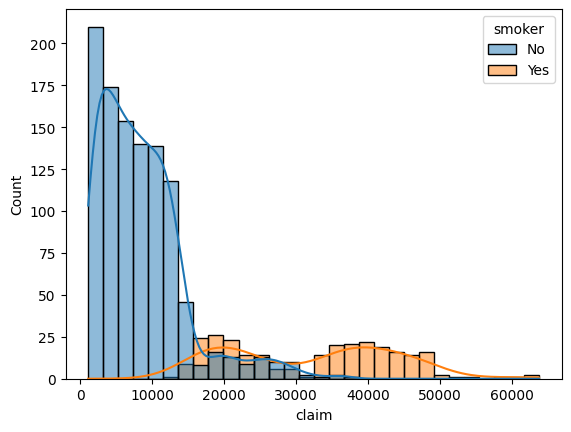

In [51]:
sns.histplot(df, x='claim', kde=True, hue='smoker')

* Claim for non smoker is lesser than smokers
* Most Claims of non smokers lies in range 0-15000, and Smoker's claims are greater than 15000

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

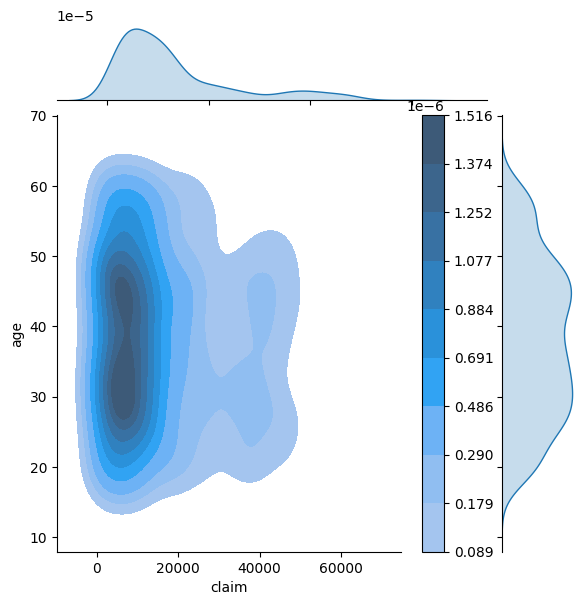

In [52]:
# code here
sns.jointplot(data=df, x='claim', y='age', kind='kde', fill=True, cbar=True)

<Axes: xlabel='age', ylabel='claim'>

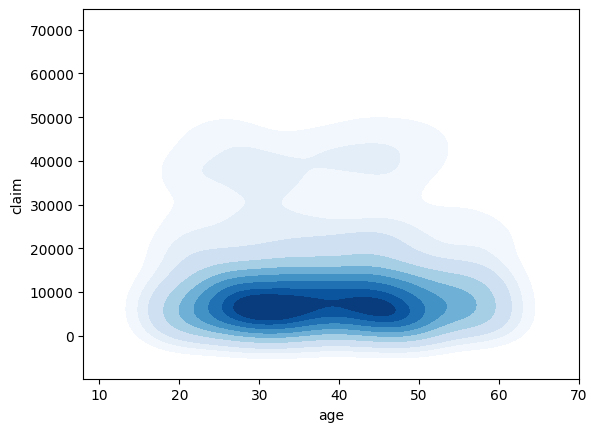

In [53]:
sns.kdeplot(data = df, x = 'age', y = 'claim', cmap='Blues', thresh=0.05, fill=True)

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<Axes: xlabel='claim', ylabel='Density'>

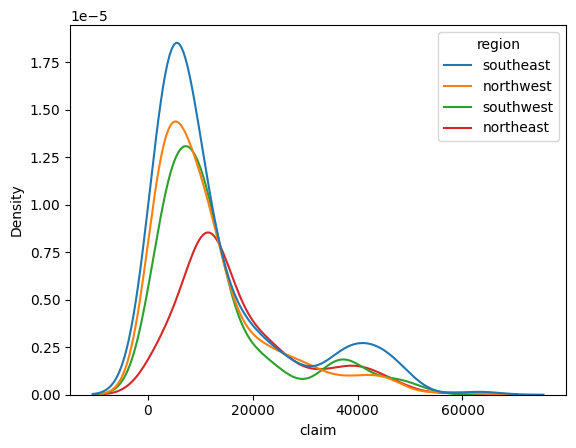

In [57]:
# code here
sns.kdeplot(df, x='claim',hue='region')

* Leaving northeast, all other regions have high density around same claim amount.
* All regions follow same trends of claims, global peak around 6000-10000 and a local peak around 40000.

### Q6: Plot PDF and CDF of claim in insurance data

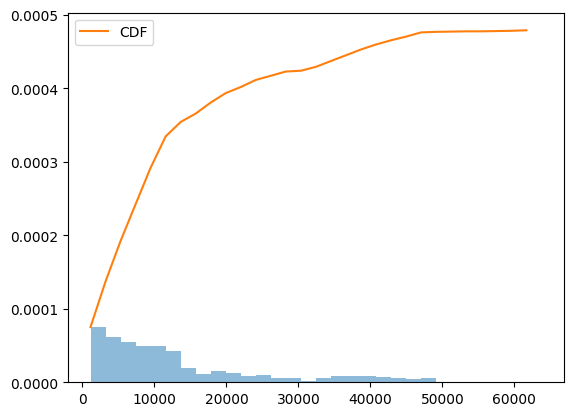

In [58]:
# code here
bins = 30
density, bins, _ = plt.hist(df['claim'], bins=bins, density=True, alpha=0.5)
cdf = np.cumsum(density)
plt.plot(bins[:-1], cdf, label='CDF')
plt.legend()
plt.show()

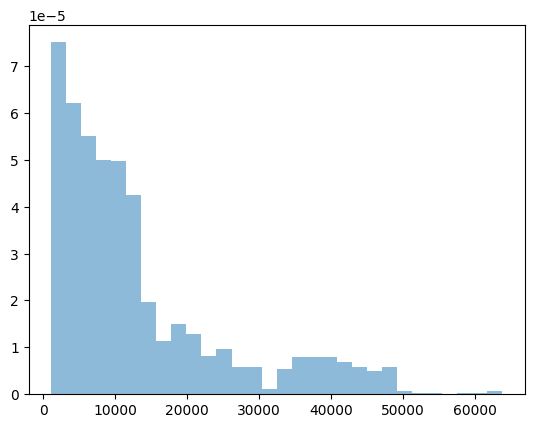

In [59]:
# Approach 1 - Histogram approach to which distribution follows
claim_data = insurance.claim
bins = 30  # Number of bins for histogram
density, bins, _ = plt.hist(claim_data, bins=bins, density=True, alpha=0.5)

* As above hist plot is not nirmal we are going with non parametric approach.

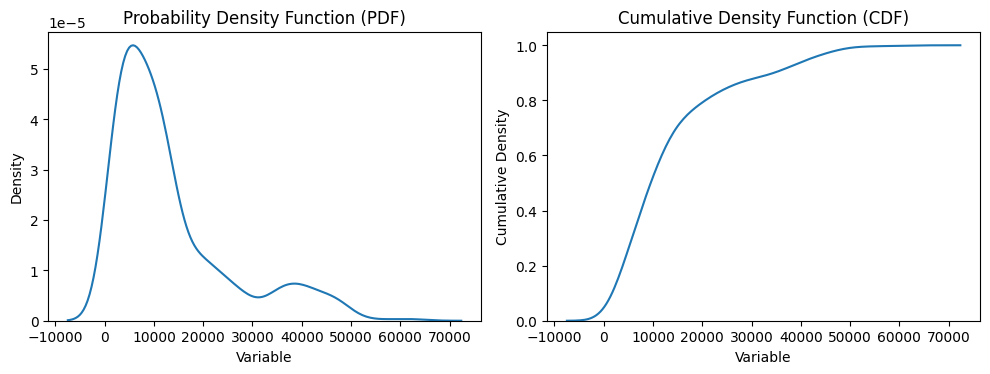

In [61]:
# Generate sample data (replace with your actual data )
data = claim_data
plt.figure(figsize=(10, 4))

# Plot PDF using KDE
plt.subplot(1, 2, 1)
sns.kdeplot(data)
plt.xlabel("Variable")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF)")

# Plot CDF using KDE
plt.subplot(1, 2, 2)
sns.kdeplot(data, cumulative=True)
plt.xlabel('Variable')
plt.ylabel('Cumulative Density')
plt.title('Cumulative Density Function (CDF)')

# Adjusting layout and display the plots
plt.tight_layout()
plt.show()
# Non Parametric Approach

### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

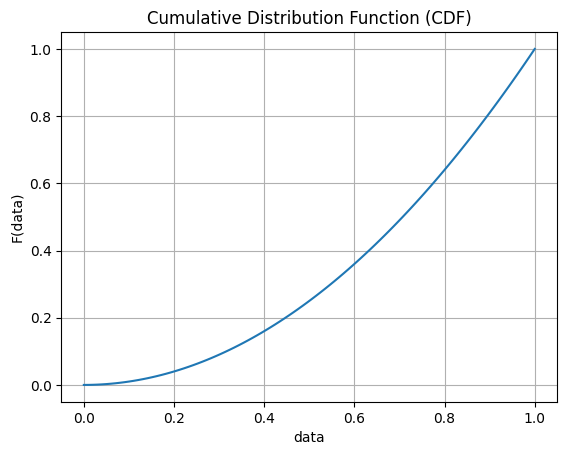

Probability that X is greater than 0.5: 0.75


In [66]:
# code here

# Define the Probability Density Function(PDF)
def pdf(x):
  if x <= 1 and x >= 0:
  # if 0 <= x < 1:
    return x*2
  else:
    return 0

def cdf(x):
  if x < 0:
    return 0
  elif 0 <= x < 1:
    return x**2
  else: return 1

# Generate sample data
data = np.linspace(0, 1, 100)

# Calculate the PDF and CDF
pdf_data = [pdf(x) for x in data]
cdf_data = np.array([cdf(x) for x in data])

# Plot the CDF
plt.plot(data, cdf_data)
plt.xlabel('data')
plt.ylabel('F(data)')
plt.title("Cumulative Distribution Function (CDF)")
plt.grid(True)
plt.show()

# Calculate the probability that X is greater than 0.5
p_x_gt_0_5 = 1 - cdf(0.5)
print("Probability that X is greater than 0.5:", p_x_gt_0_5)


### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

In [ ]:
# answer here

### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

In [ ]:
# answer here